In [2]:
#import necessary libraries
#Data manipulation and analysis.
import pandas as pd
#Basic plotting and visualization
import matplotlib.pyplot as plt
#Numerical computing and array manipulation.
import numpy as np
#Statistical data visualization and (more aesthetically pleasing plotting than matplotlib)
import seaborn as sns

In [3]:
#Read a CSV file into a pandas DataFrame.
data=pd.read_csv("walmart-sales-dataset-of-45stores.csv")
#Create a new Data Frame using (the data stored in the variable data).
df=pd.DataFrame(data)

In [5]:
#a summary of the data frame (quicker than printing the whole data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
#Print the data frame as a string (showing all rows and columns)
#To check for any inconsistencies(missing values, duplicates, outliers, etc..) and to understand the structure.
print(df.to_string())

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1  05-02-2010    1643690.90             0        42.31       2.572  211.096358         8.106
1         1  12-02-2010    1641957.44             1        38.51       2.548  211.242170         8.106
2         1  19-02-2010    1611968.17             0        39.93       2.514  211.289143         8.106
3         1  26-02-2010    1409727.59             0        46.63       2.561  211.319643         8.106
4         1  05-03-2010    1554806.68             0        46.50       2.625  211.350143         8.106
5         1  12-03-2010    1439541.59             0        57.79       2.667  211.380643         8.106
6         1  19-03-2010    1472515.79             0        54.58       2.720  211.215635         8.106
7         1  26-03-2010    1404429.92             0        51.45       2.732  211.018042         8.106
8         1  02-04-2010    1594968.28             0        62.27       2.

In [5]:
#checking for any missing value
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are no missing values
Therefore, the data is clean

In [6]:
#duplicates
print(df[df.duplicated()])

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


there are no duplicate values
Therefore, the data is clean

In [7]:
#check if the data is loaded correctly before doing any analysis or processing
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
#Convert some columns to numeric data types, changing / 'coercing' errors into NaN (when conversion is impossible).
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Fuel_Price'] = pd.to_numeric(df['Fuel_Price'], errors='coerce')
df['CPI'] = pd.to_numeric(df['CPI'], errors='coerce')
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')

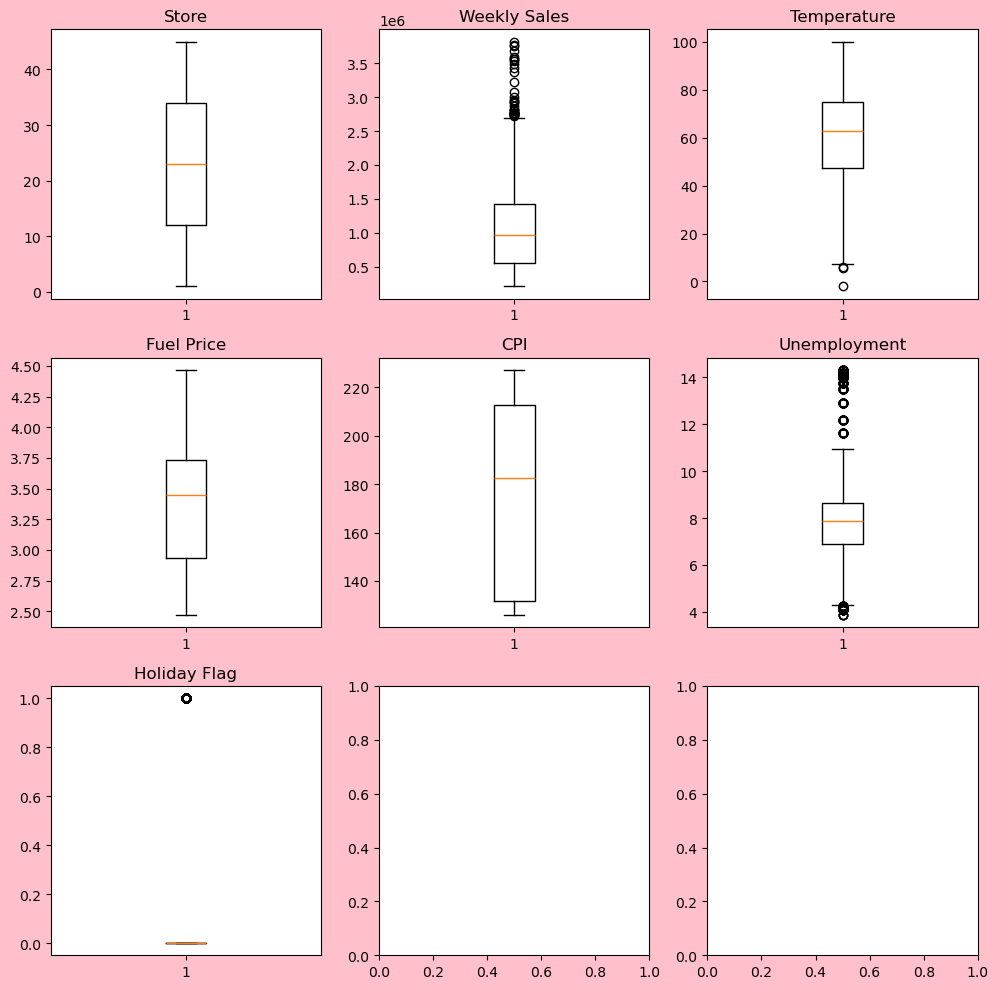

In [11]:
#analyse each column and find outliers using boxplots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.set_facecolor('pink')

axs[0, 0].boxplot(df['Store'])
axs[0, 0].set_title('Store')

axs[0, 1].boxplot(df['Weekly_Sales'])
axs[0, 1].set_title('Weekly Sales')

axs[0, 2].boxplot(df['Temperature'])
axs[0, 2].set_title('Temperature')

axs[1, 0].boxplot(df['Fuel_Price'])
axs[1, 0].set_title('Fuel Price')

axs[1, 1].boxplot(df['CPI'])
axs[1, 1].set_title('CPI')

axs[1, 2].boxplot(df['Unemployment'])
axs[1, 2].set_title('Unemployment')

axs[2, 0].boxplot(df['Holiday_Flag'])
axs[2, 0].set_title('Holiday Flag')

plt.tight_layout()
plt.show()

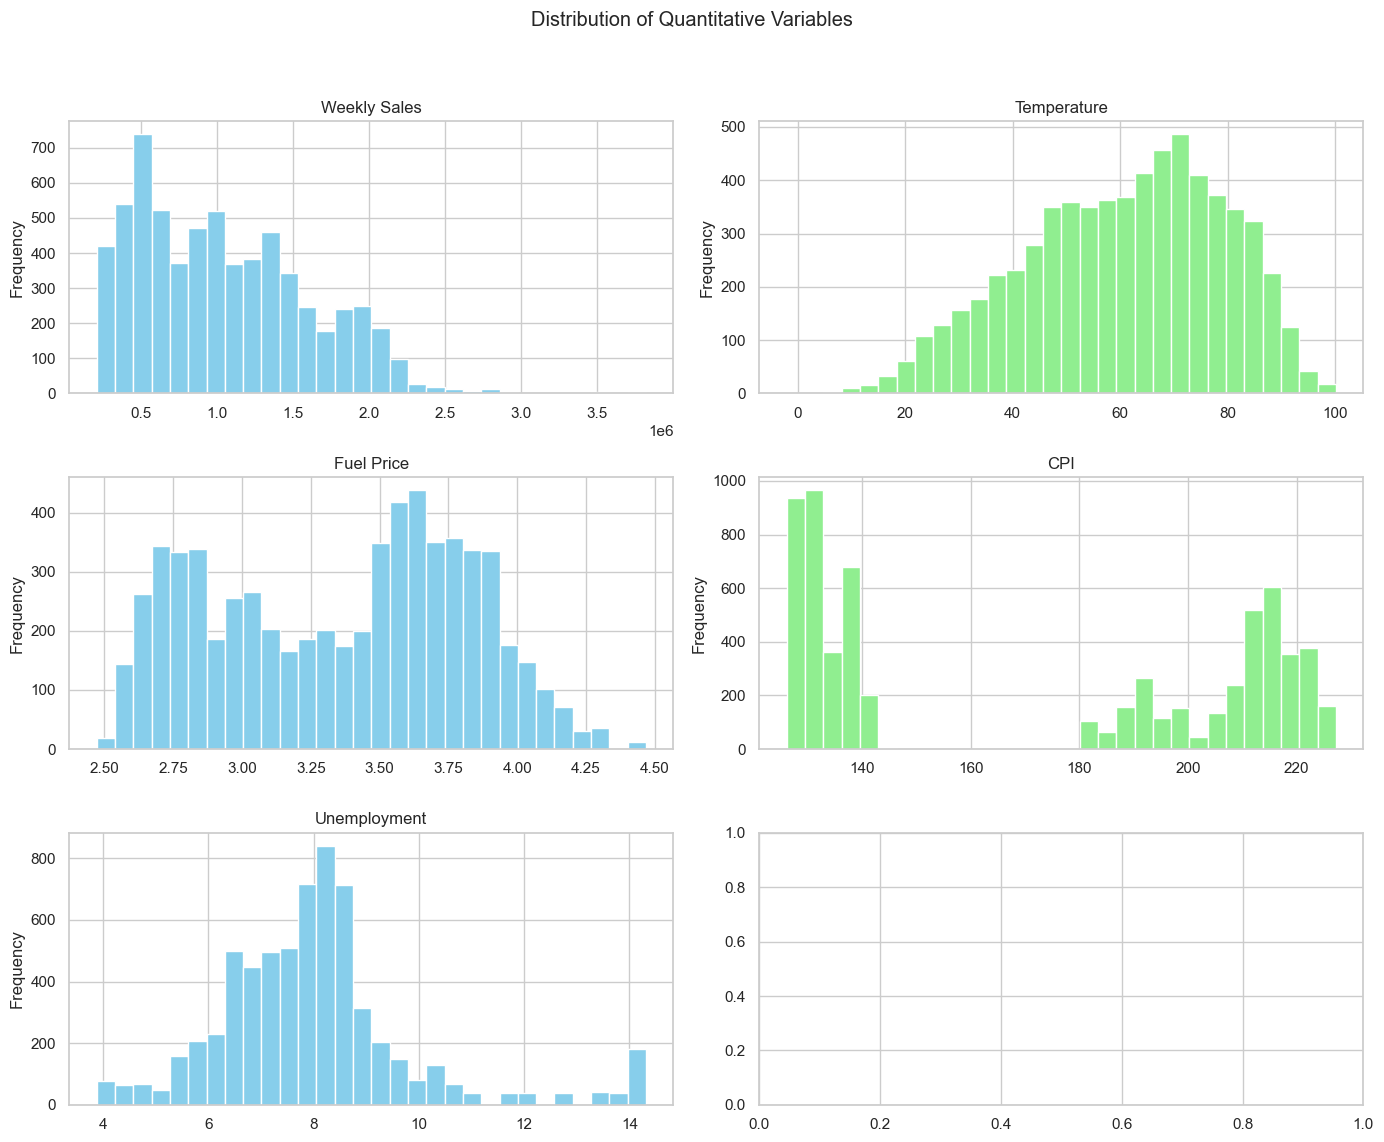

In [17]:
# Set the plot style
sns.set(style='whitegrid')

# Plotting distributions of quantitative variables

#Create a figure with a grid of subplots
#arranged in 3 rows and 2 columns, 
#with a specified size of 14 inches in width and 12 inches in height.
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution of Quantitative Variables')

#'bins' specifies the number of intervals for the histogram bars.
df['Weekly_Sales'].plot(kind='hist', bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Weekly Sales')

df['Temperature'].plot(kind='hist', bins=30, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Temperature')

df['Fuel_Price'].plot(kind='hist', bins=30, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Fuel Price')

df['CPI'].plot(kind='hist', bins=30, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('CPI')

df['Unemployment'].plot(kind='hist', bins=30, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Unemployment')

# Adjust padding for the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

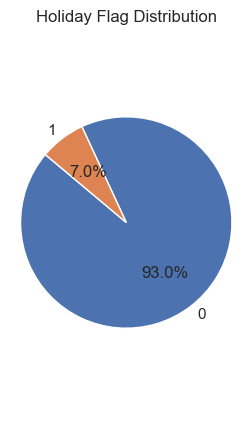

In [18]:
# Create a pie chart for the 'Holiday_Flag' column
#representations for the pie chart: 1 holiday AND 0 non holiday
holiday_counts = df['Holiday_Flag'].value_counts()

plt.figure(figsize=(3,5))
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Holiday Flag Distribution')
plt.axis('equal')  #pie is drawn as a circle.
plt.show()

Weekly Sales vs Numarical values

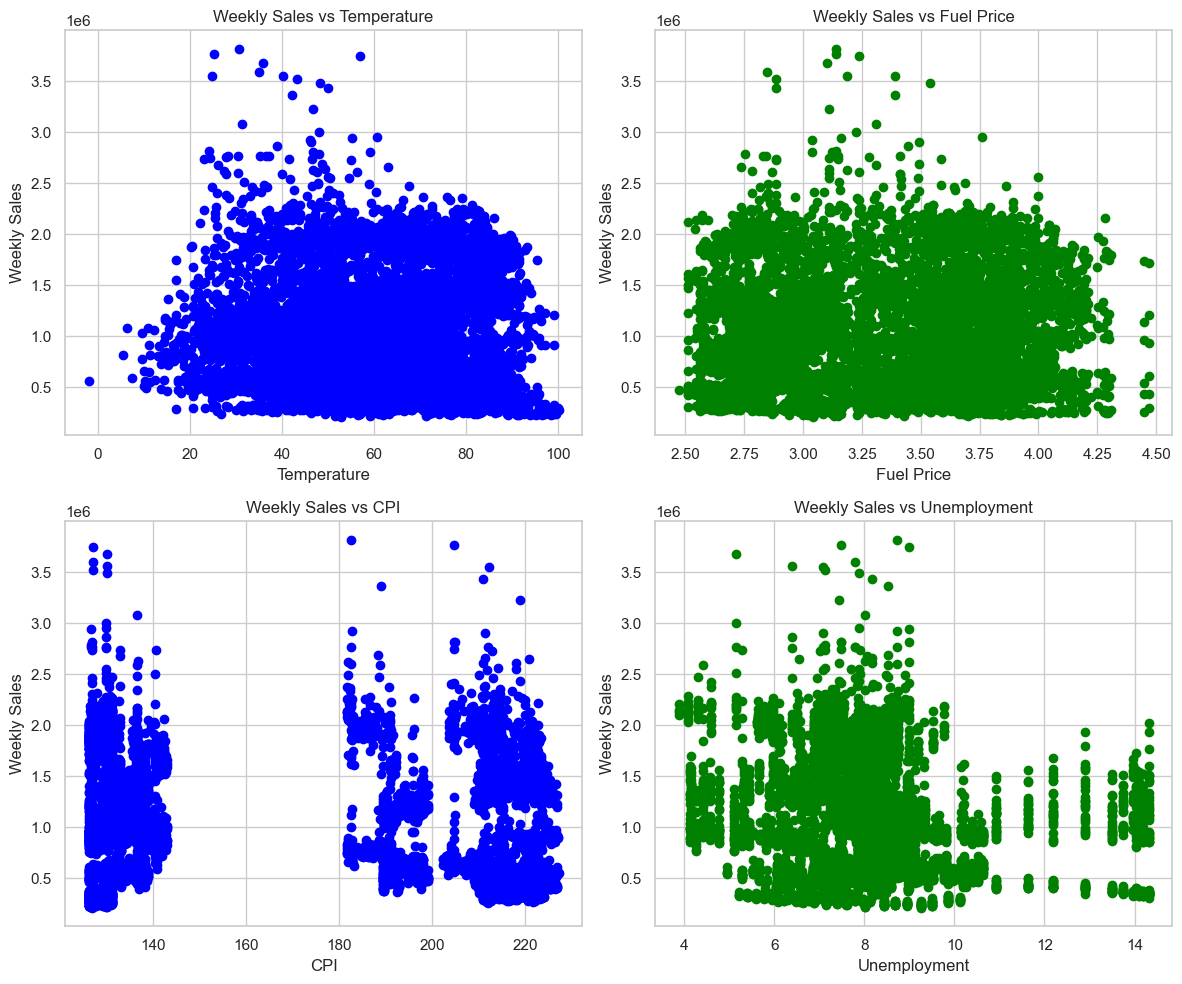

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for Weekly Sales vs Temperature
axes[0, 0].scatter(df['Temperature'], df['Weekly_Sales'], color='blue')
axes[0, 0].set_title('Weekly Sales vs Temperature')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Weekly Sales')
axes[0, 0].grid(True)

# Scatter plot for Weekly Sales vs Fuel Price
axes[0, 1].scatter(df['Fuel_Price'], df['Weekly_Sales'], color='green')
axes[0, 1].set_title('Weekly Sales vs Fuel Price')
axes[0, 1].set_xlabel('Fuel Price')
axes[0, 1].set_ylabel('Weekly Sales')
axes[0, 1].grid(True)

# Scatter plot for Weekly Sales vs CPI
axes[1, 0].scatter(df['CPI'], df['Weekly_Sales'], color='blue')
axes[1, 0].set_title('Weekly Sales vs CPI')
axes[1, 0].set_xlabel('CPI')
axes[1, 0].set_ylabel('Weekly Sales')
axes[1, 0].grid(True)

# Scatter plot for Weekly Sales vs Unemployment
axes[1, 1].scatter(df['Unemployment'], df['Weekly_Sales'], color='green')
axes[1, 1].set_title('Weekly Sales vs Unemployment')
axes[1, 1].set_xlabel('Unemployment')
axes[1, 1].set_ylabel('Weekly Sales')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()



WHIICH STORE HAS THE MAXIMUM SALES?

<Axes: title={'center': 'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

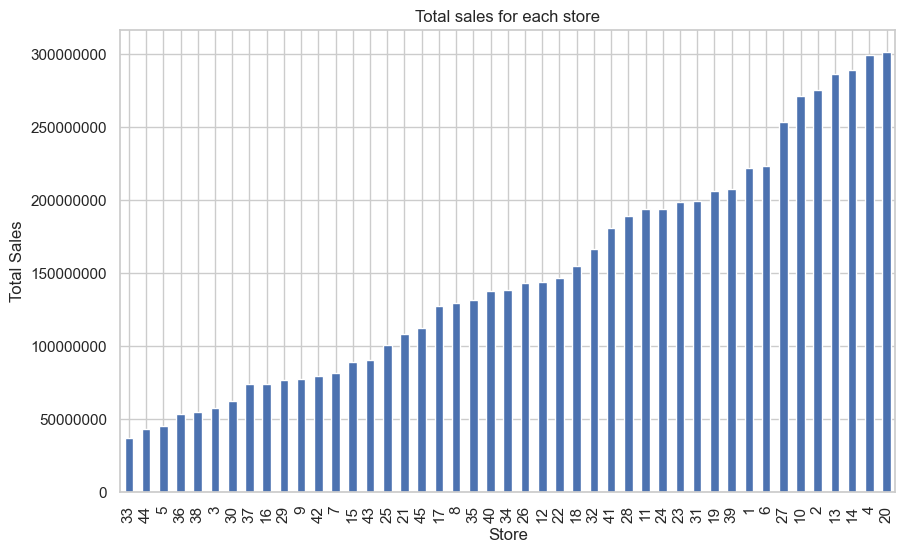

In [15]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [22]:
#create a new variable called ‘total_sales’. Then group by stores and find the sum of the weekly sales of each store.
total_sales =df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
pd.DataFrame(total_sales).head(3)

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0


STORE 20 HAS THE HIGHEST NUMBER OF WEEKLY SALES

WHICH STORE HAS MAXIMUM STANDARD DEVIATION (varying sales)?

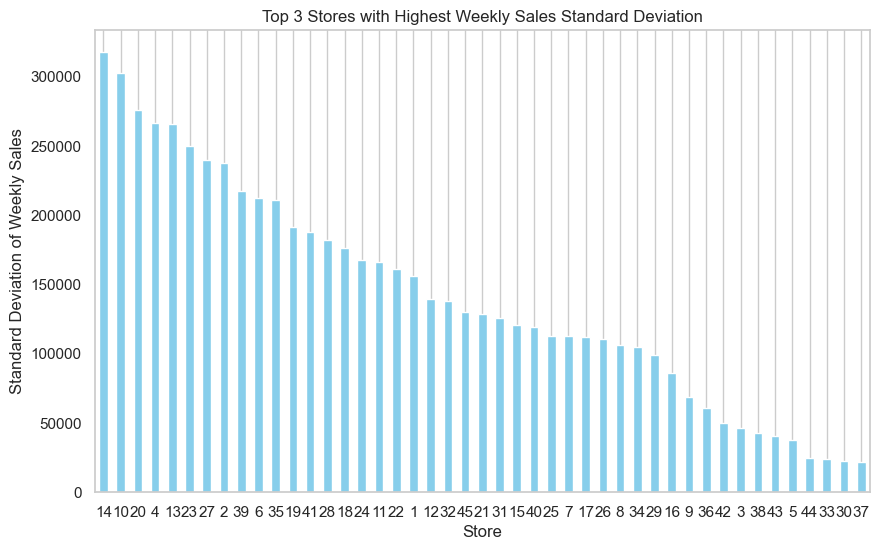

In [34]:
plt.figure(figsize=(10,6))
df_std.plot(kind='bar', color='skyblue')
plt.title('Top 3 Stores with Highest Weekly Sales Standard Deviation')
plt.xlabel('Store')
plt.ylabel('Standard Deviation of Weekly Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(axis='y')
plt.show()


In [24]:
#creating a dataframe walmart_data_std 
#create a new variable and then group it by stores and find the standard deviation
df_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
pd.DataFrame(df_std).head(3)

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742


STORE 14 HAS THE MOST VARYING WEEKLY SALES

WHICH HOLIDAYS HAVE HIGHER SALES THAN NON-HOLIDAY "MEAN" SALES?

In [35]:
# Add year column and convert Date column to date time format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = data['Date'].dt.month_name()

In [68]:
# Define the holiday dates
Super_Bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
Labour_Day = ['2010-09-10', '2011-09-09', '2012-09-07']
Thanksgiving = ['2010-11-26', '2011-11-25', '2012-11-23']
Christmas = ['2010-12-31', '2011-12-30', '2012-12-28']

holiday_dates = Super_Bowl + Labour_Day + Thanksgiving + Christmas


Super_Bowl_sales = df.loc[data['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean()
Super_Bowl_sales = round(Super_Bowl_sales, 2)

Labour_Day_sales = df.loc[data['Date'].isin(Labour_Day)]['Weekly_Sales'].mean()
Labour_Day_sales = round(Labour_Day_sales, 2)

Thanksgiving_sales = df.loc[data['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean()
Thanksgiving_sales = round(Thanksgiving_sales, 2)

Christmas_sales = df.loc[data['Date'].isin(Christmas)]['Weekly_Sales'].mean()
Christmas_sales = round(Christmas_sales, 2)

non_holiday_sales = df[~df['Date'].isin(holiday_dates)]['Weekly_Sales']
non_holiday_sales = non_holiday_sales.mean()
non_holiday_sales = round(non_holiday_sales, 2)


Super_Bowl_sales,Labour_Day_sales,Thanksgiving_sales,Christmas_sales,non_holiday_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11, 1046964.88)

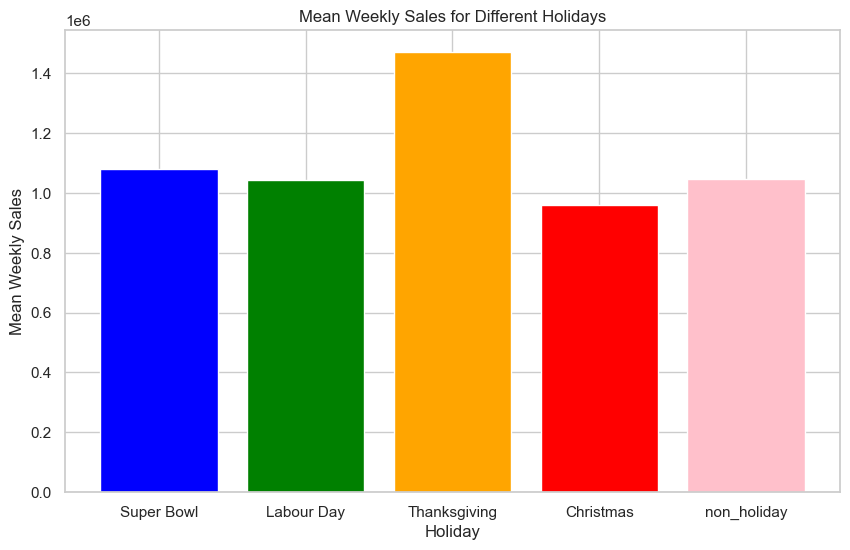

In [67]:
holidays = ['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas', 'non_holiday']

mean_sales = [Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales , non_holiday_sales]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(holidays, mean_sales, color=['blue', 'green', 'orange', 'red','pink'])
plt.title('Mean Weekly Sales for Different Holidays')
plt.xlabel('Holiday')
plt.ylabel('Mean Weekly Sales')
plt.show()

THANKS GIVING HAS THE HIGHEST SALES OUT OF ALL HOLIDAYS AND NON HOLIDAYS

WHAT ARE THE MONTHLY AND SEMESTER SALES ?

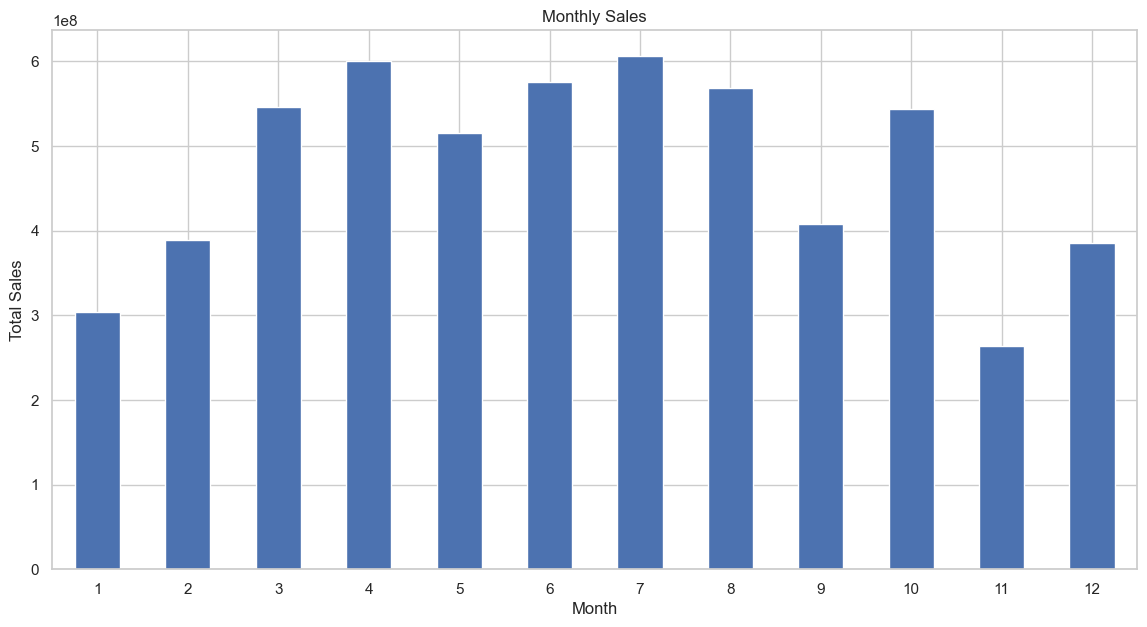

In [48]:
# Convert 'Date' column to datetime format with the correct format specified
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Monthly view of sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(14,7))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=0)
plt.show()


THE WINTER SEASON'S MONTHS HAVE THE LEAST AMOUNT OF SALES(10, 11, 12, 1)--
THE SUMMER/SPRING SEASON'S MONTHS HAVE THE HIGHEST AMOUNT OF SALES(4,5,6,7,8)--
NOVEMEBR IS THE ONLY MONTH THAT DOESNT SELL HALF AS MUCH AS THE MEAN

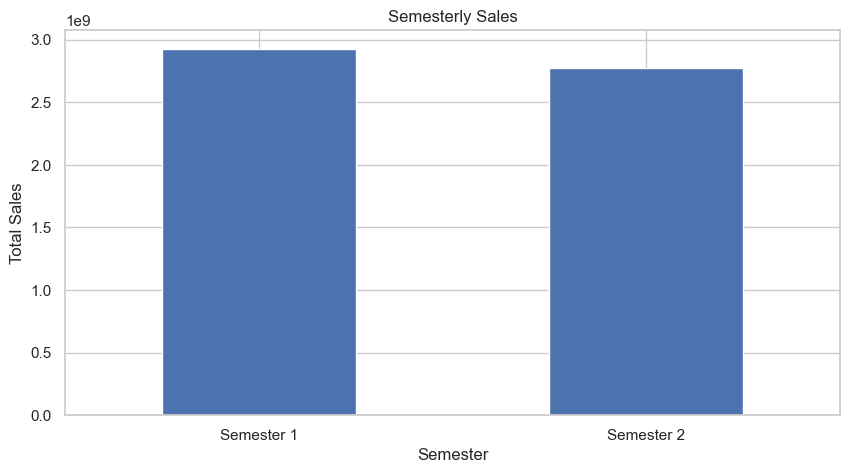

In [95]:
# Assuming 'Date' column is in datetime format
df['Semester'] = df['Date'].dt.quarter.apply(lambda x: 'Semester 1' if x <= 2 else 'Semester 2')

# Semester view of sales
semesterly_sales = df.groupby('Semester')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(10,5))
semesterly_sales.plot(kind='bar')
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('Semesterly Sales')
plt.xticks(rotation=0)
plt.show()


BOTH SEMESTERS SELL AT A SIMILAR RATE WITH SEMESTER 1 SLIGHTLY HIGHER THAN 2

Plot the relations between weekly sales vs. other numeric features and give insights.

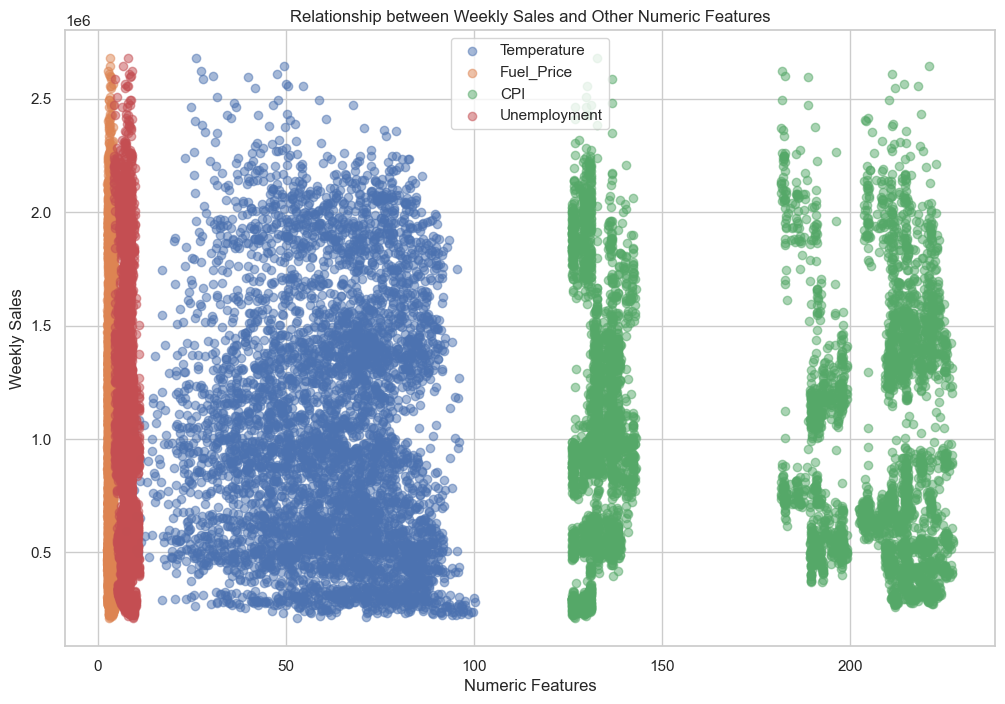

In [96]:
# List of numeric features to plot against weekly sales
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Plotting
plt.figure(figsize=(12, 8))

for feature in numeric_features:
    plt.scatter(df[feature], df['Weekly_Sales'], label=feature, alpha=0.5)

plt.xlabel('Numeric Features')
plt.ylabel('Weekly Sales')
plt.title('Relationship between Weekly Sales and Other Numeric Features')
plt.legend()
plt.grid(True)
plt.show()
